In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df = df.sample(n = 5000, random_state=42).reset_index(drop=True)
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.6880,1980,0.0311,['Nazareth'],0.615,216253,0.834,0,4HoTskE5N0oEM4CKRfuzFI,0.000003,7,0.1430,-5.726,1,Holiday,29,1980,0.0318,131.606
1,0.0391,1942,0.9890,"['Giacomo Puccini', 'Leontyne Price', 'Erich L...",0.290,299120,0.167,0,2VtUcZ1yowXnhotD3yPAaW,0.000028,1,0.2900,-15.035,1,"Un bel dì (From ""Madama Butterfly"")",0,1942,0.0450,104.500
2,0.9620,1950,0.6350,['La Sonora Santanera'],0.679,181933,0.486,0,0rd7q2ibicTeKNbLUl3gTV,0.000000,7,0.3610,-10.397,0,Pena Negra,27,1950,0.0337,131.198
3,0.5900,1971,0.2420,['Jimi Hendrix'],0.460,249920,0.720,0,11t59LqOhOEG40yqALXZon,0.008310,1,0.5280,-11.263,1,Ezy Ryder,38,1971,0.0525,123.548
4,0.8520,2005,0.1390,['Alabama'],0.747,214880,0.460,0,6WJKrF37Bz6CKr3fOtxJHS,0.000001,7,0.0801,-12.797,1,The Closer You Get,40,2005-05-17,0.0280,114.254


In [ ]:
df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = [
    "valence", "danceability", "energy", "tempo", "acousticness", "liveness", "speechiness", "instrumentalness"
]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_features])
df_scaled = pd.DataFrame(df_scaled, columns=numerical_features)
df_scaled.head()

,valence,danceability,energy,tempo,acousticness,liveness,speechiness,instrumentalness
0,0.626503,0.446602,1.290997,0.467091,-1.240308,-0.362372,-0.413981,-0.536868
1,-1.848304,-1.400498,-1.157184,-0.416965,1.281545,0.462644,-0.337475,-0.536790
2,1.671498,0.810339,0.013685,0.453784,0.349573,0.861121,-0.402969,-0.536877
3,0.252746,-0.434322,0.872567,0.204281,-0.685073,1.798384,-0.294005,-0.510473
4,1.251975,1.196809,-0.081747,-0.098841,-0.956240,-0.715388,-0.436006,-0.536874


In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_scaled, test_size=0.2, random_state=42)

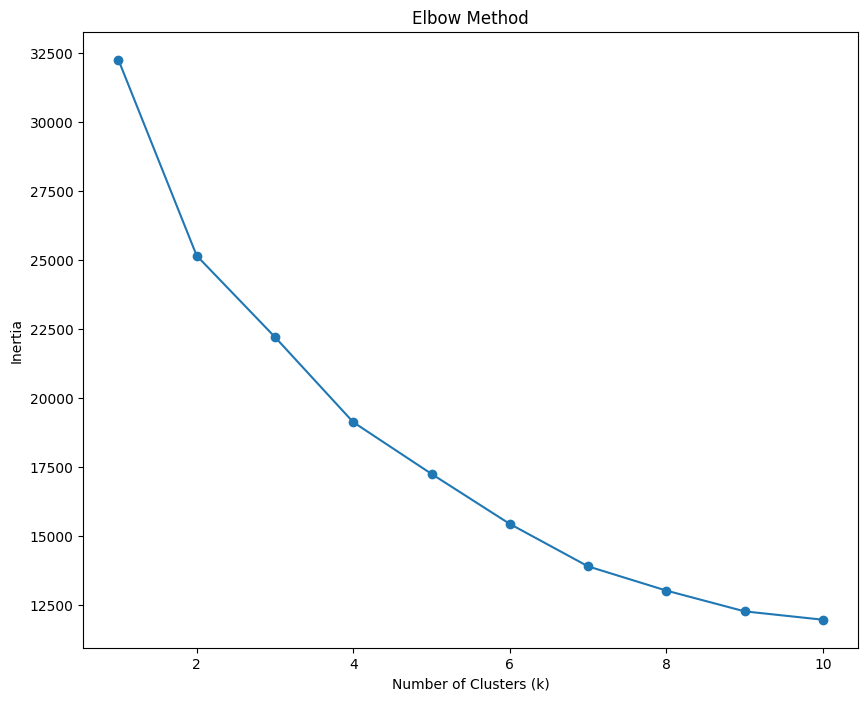

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (10,8))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [11]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [12]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,Cluster
0,0.6880,1980,0.0311,['Nazareth'],0.615,216253,0.834,0,4HoTskE5N0oEM4CKRfuzFI,0.000003,7,0.1430,-5.726,1,Holiday,29,1980,0.0318,131.606,2
1,0.0391,1942,0.9890,"['Giacomo Puccini', 'Leontyne Price', 'Erich L...",0.290,299120,0.167,0,2VtUcZ1yowXnhotD3yPAaW,0.000028,1,0.2900,-15.035,1,"Un bel dì (From ""Madama Butterfly"")",0,1942,0.0450,104.500,1
2,0.9620,1950,0.6350,['La Sonora Santanera'],0.679,181933,0.486,0,0rd7q2ibicTeKNbLUl3gTV,0.000000,7,0.3610,-10.397,0,Pena Negra,27,1950,0.0337,131.198,2
3,0.5900,1971,0.2420,['Jimi Hendrix'],0.460,249920,0.720,0,11t59LqOhOEG40yqALXZon,0.008310,1,0.5280,-11.263,1,Ezy Ryder,38,1971,0.0525,123.548,0
4,0.8520,2005,0.1390,['Alabama'],0.747,214880,0.460,0,6WJKrF37Bz6CKr3fOtxJHS,0.000001,7,0.0801,-12.797,1,The Closer You Get,40,2005-05-17,0.0280,114.254,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.2420,1956,0.9440,['Horace Silver'],0.597,463347,0.260,0,0ayhuasvBMvPHYBYpipxlM,0.815000,0,0.2080,-12.295,0,Silver's Blue,16,1956,0.0486,135.152,4
4996,0.1600,2007,0.0015,['Metalocalypse: Dethklok'],0.294,270880,0.858,0,3fXjDa7j6p59VvN4lLI5lQ,0.061000,7,0.3330,-6.044,0,Detharmonic,42,2007-09-25,0.0691,120.163,0
4997,0.7150,1967,0.2280,"['Big Brother & The Holding Company', 'Janis J...",0.557,123160,0.568,0,17jKybtnI3cORPYawoXiMG,0.000581,0,0.0973,-7.541,1,Women Is Losers,36,1967,0.0504,136.736,2
4998,0.7610,1935,0.1900,['Эрнест Хемингуэй'],0.720,101400,0.132,1,0GjfGeP3Afp4pPlvYAJRxf,0.000000,11,0.1430,-17.801,0,Часть 84.2 - Зеленые холмы Африки,0,1935,0.9250,127.814,3


In [13]:
df['Cluster'].value_counts()

,count
Cluster,
2,1570
1,1276
0,1210
4,734
3,210


Text(0, 0.5, 'Principal Component 2')

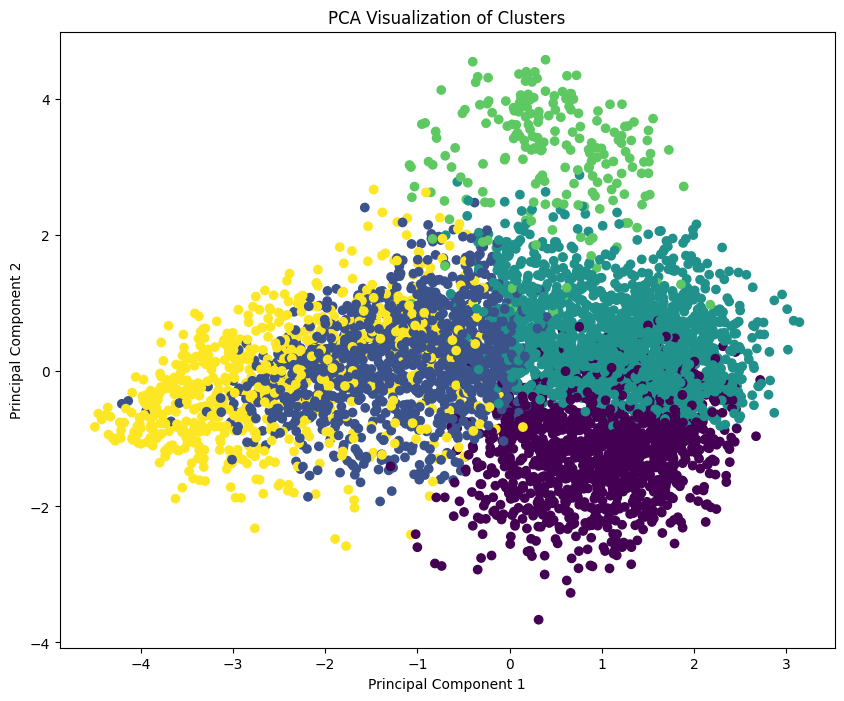

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_songs(song_name, df, num_recommendations=5):
    # get cluster for the input song
    song_cluster = df[df['name'] == song_name]['Cluster'].values[0]

    # get songs in the same cluster
    same_cluster_songs = df[df['Cluster'] == song_cluster]

    # calculater similarity within the same cluster
    # Get the index of the input song within the same_cluster_songs DataFrame
    song_index = same_cluster_songs[same_cluster_songs['name'] == song_name].index[0]

    # Reset the index of same_cluster_songs to avoid potential issues
    same_cluster_songs = same_cluster_songs.reset_index(drop=True)

    # Get the updated index of the input song within the reset DataFrame
    song_index = same_cluster_songs[same_cluster_songs['name'] == song_name].index[0]

    cluster_features = same_cluster_songs[numerical_features]
    similarity = cosine_similarity(cluster_features, cluster_features)

    # Get top recommendations
    similar_songs = np.argsort(similarity[song_index])[-(num_recommendations + 1):-1][::-1]
    recommended_songs = same_cluster_songs.iloc[similar_songs][['name', 'artists']]

    return recommended_songs

In [30]:
input_song = "Camby Bolongo"
recommend_songs = recommend_songs(input_song,df, num_recommendations=5)  # Remove df from arguments
print(f"Recommended songs for '{input_song}':")
recommend_songs

Recommended songs for 'Camby Bolongo':


,name,artists
1568,Bitch to the Boys,['Shakatak']
426,Chella llà - Instrument and base Version,['Orchestra Studio 7']
1216,Danse Fambeaux,['Dr. John']
1455,"Aragon - From The ""Coffy"" Soundtrack",['Roy Ayers']
483,Into Black,['Blouse']


In [35]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_songs_function(song_name, df, num_recommendations=5):  # Rename the function
    # get cluster for the input song
    song_cluster = df[df['name'] == song_name]['Cluster'].values[0]

    # get songs in the same cluster
    same_cluster_songs = df[df['Cluster'] == song_cluster]

    # calculater similarity within the same cluster
    # Get the index of the input song within the same_cluster_songs DataFrame
    song_index = same_cluster_songs[same_cluster_songs['name'] == song_name].index[0]

    # Reset the index of same_cluster_songs to avoid potential issues
    same_cluster_songs = same_cluster_songs.reset_index(drop=True)

    # Get the updated index of the input song within the reset DataFrame
    song_index = same_cluster_songs[same_cluster_songs['name'] == song_name].index[0]

    cluster_features = same_cluster_songs[numerical_features]
    similarity = cosine_similarity(cluster_features, cluster_features)

    # Get top recommendations
    similar_songs = np.argsort(similarity[song_index])[-(num_recommendations + 1):-1][::-1]
    recommended_songs = same_cluster_songs.iloc[similar_songs][['name', 'artists']]

    return recommended_songs


In [36]:
# Now call the function with a different variable name to store the results
input_song = "Camby Bolongo"
recommendations = recommend_songs_function(input_song, df, num_recommendations=5)
print(f"Recommended songs for '{input_song}':")
print(recommendations)

Recommended songs for 'Camby Bolongo':
                                          name                 artists
1568                         Bitch to the Boys            ['Shakatak']
426   Chella llà - Instrument and base Version  ['Orchestra Studio 7']
1216                            Danse Fambeaux            ['Dr. John']
1455      Aragon - From The "Coffy" Soundtrack           ['Roy Ayers']
483                                 Into Black              ['Blouse']


In [37]:
input_song = "Soul Junction"
recommendations = recommend_songs_function(input_song, df, num_recommendations=5)
print(f"Recommended songs for '{input_song}':")
print(recommendations)

Recommended songs for 'Soul Junction':
                                                  name  \
459                                      Ahmad's Blues   
571                                              Laura   
158              Kinderszenen, Op. 15: No. 8, Am Kamin   
438  Concerto For 2 Mandolins, Strings And Continuo...   
160  Pictures at an Exhibition: VI. Samuel Goldenbe...   

                                               artists  
459                                    ['Ahmad Jamal']  
571                                  ['Erroll Garner']  
158           ['Robert Schumann', 'Vladimir Horowitz']  
438  ['Antonio Vivaldi', 'Angel Romero', 'Pepe Rome...  
160  ['Modest Mussorgsky', 'Leonard Bernstein', 'Ne...  


In [38]:
df.to_csv("clustered_df.csv")